In [262]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error

from scipy.sparse.linalg import svds # for sparse matrices

In [263]:
df = pd.read_csv("steam-200k.csv",header=None)
df.columns=["user_id",'game','type','rating','nothing']
df.head()

,user_id,game,type,rating,nothing
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [264]:
df1= df[(df["rating"]>1) & (df["rating"]<100)]


In [265]:
df1.head()

,user_id,game,type,rating,nothing
3,151603712,Fallout 4,play,87.0,0
5,151603712,Spore,play,14.9,0
7,151603712,Fallout New Vegas,play,12.1,0
9,151603712,Left 4 Dead 2,play,8.9,0
11,151603712,HuniePop,play,8.5,0


<AxesSubplot: xlabel='rating', ylabel='Count'>

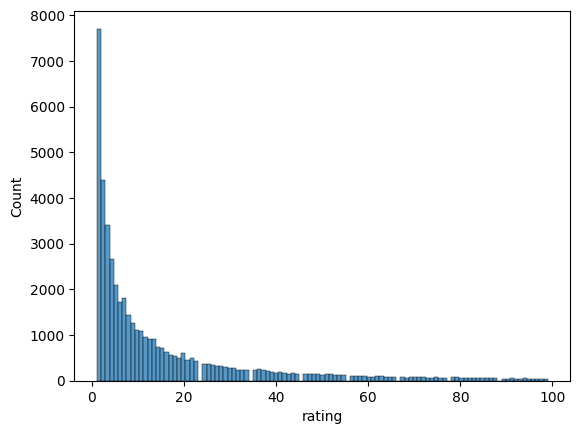

In [266]:
sns.histplot(df1["rating"])

In [267]:

# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df1["user_id"].nunique())
print('Number of unique GAMES in Raw data = ', df1["game"].nunique())

Number of unique USERS in Raw data =  8430
Number of unique GAMES in Raw data =  3020


In [268]:
most_rated = df1.groupby("user_id").size().sort_values(ascending=False)[:10]
most_rated

user_id
62990992     425
138941587    276
11403772     265
49893565     210
24469287     205
116876958    195
48798067     194
47457723     177
11373749     166
17530772     163
dtype: int64

In [269]:

counts = df1["user_id"].value_counts()
df_final = df1[df1["user_id"].isin(counts[counts >= 50].index)]

In [270]:

print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final["user_id"].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final["game"].nunique())

The number of observations in the final data = 13966
Number of unique USERS in the final data =  164
Number of unique PRODUCTS in the final data =  2302


In [271]:

#Creating the interaction matrix of products and users based on ratings and replacing NaN value with 0
final_ratings_matrix = df_final.pivot_table(index = 'user_id', columns ='game', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

#Finding the number of non-zero entries in the interaction matrix 
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

#Finding the possible number of ratings as per the number of users and products
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

#Density of ratings
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (164, 2302)
given_num_of_ratings =  13965
possible_num_of_ratings =  377528
density: 3.70%


game,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,140,16bit Trader,18 Wheels of Steel American Long Haul,...,eden*,fault milestone one,fault milestone two sideabove,iBomber Defense,ibb & obb,liteCam Game 100 FPS Game Capture,realMyst,resident evil 4 / biohazard 4,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
298950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
561758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
975449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1936551,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2259650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [272]:
final_ratings_matrix.to_csv('final_ratings_matrix')

In [274]:
#Calculate the average rating for each product 
average_rating = df_final.groupby('game').mean()['rating']

#Calculate the count of ratings for each product
count_rating = df_final.groupby('game').count()['rating']

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame({'avg_rating':average_rating, 'rating_count':count_rating})

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='avg_rating',ascending=False)

final_rating.head()

C:\Users\RAJESH SOLANKI\AppData\Local\Temp\ipykernel_42240\3920689740.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating = df_final.groupby('game').mean()['rating']


,avg_rating,rating_count
game,,
Action! - Gameplay Recording and Streaming,83.0,1
Age of Empires Online,76.0,1
NBA 2K13,73.5,2
liteCam Game 100 FPS Game Capture,68.0,1
Dragon Age II,65.0,2


In [275]:
# final_rating.to_csv('final_rating.csv')

In [276]:
def top_n_products(final_rating, n, min_interaction):
    
    #Finding products with minimum number of interactions
    recommendations = final_rating[final_rating['rating_count']>min_interaction]
    
    #Sorting values w.r.t average rating 
    recommendations = recommendations.sort_values('avg_rating',ascending=False)
    
    return recommendations.index[:n]

In [277]:
# Recommending top 5 products with 50 minimum interactions based on popularity
list(top_n_products(final_rating, 5, 50))

["Sid Meier's Civilization V",
 'Borderlands 2',
 'The Elder Scrolls V Skyrim',
 'Terraria',
 'Fallout New Vegas']

In [278]:
final_ratings_matrix['user_id'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_id'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

game,1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby),10 Second Ninja,"10,000,000",100% Orange Juice,12 Labours of Hercules,12 Labours of Hercules II The Cretan Bull,12 Labours of Hercules III Girl Power,140,16bit Trader,18 Wheels of Steel American Long Haul,...,eden*,fault milestone one,fault milestone two sideabove,iBomber Defense,ibb & obb,liteCam Game 100 FPS Game Capture,realMyst,resident evil 4 / biohazard 4,theHunter,theHunter Primal
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [279]:
# defining a function to get similar users
def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]): #  .shape[0] gives number of rows
        
        #finding cosine similarity between the user_id and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        
        #Appending the user and the corresponding similarity score with user_id as a tuple
        similarity.append((user,sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [tup[0] for tup in similarity] #Extract the user from each tuple in the sorted list
    similarity_score = [tup[1] for tup in similarity] ##Extracting the similarity score from each tuple in the sorted list
   
    #Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [280]:

similar = similar_users(3,final_ratings_matrix)[0][0:10]
similar

[6, 47, 60, 5, 55, 68, 109, 144, 76, 78]

In [281]:
similar_users(15,final_ratings_matrix)[1][0:10]

[array([[0.45194392]]),
 array([[0.35477467]]),
 array([[0.35403907]]),
 array([[0.34851043]]),
 array([[0.30606806]]),
 array([[0.29745479]]),
 array([[0.28169214]]),
 array([[0.27922449]]),
 array([[0.27837488]]),
 array([[0.27117413]])]

In [282]:
def mse(user_index,similar_user_tuple,interactions_matrix):

    mse_dataset=0

    for user in range(0, interactions_matrix.shape[0]):
        mse_local=0
        for i in range(0, interactions_matrix.shape[1]):
            if(interactions_matrix.loc[user_index][i] != 0) :
                prediction =0
                sum1=0
                for j in range(len(similar_user_tuple)) :
                    prediction = prediction + interactions_matrix.loc[similar_user_tuple[0][j]][i] *similar_user_tuple[1][j]
                    sum1 = sum1 +similar_user_tuple[1][j]


                prediction = prediction / sum1
                actual = interactions_matrix.loc[user_index][i]

                mse_local=mse_local+(actual-prediction)**2

                # print( " actual play time = " + str(actual) + " predicted playtime = " + str(prediction))
        mse_dataset = mse_dataset + mse_local/(interactions_matrix.shape[1])
    mse_dataset = mse_dataset/(interactions_matrix.shape[0])
    print("mse = " +str(mse_dataset))
mse(3,similar_users(3,final_ratings_matrix)[:][0:5],final_ratings_matrix)

mse = [[6.25121336]]


In [283]:
import collections

def precision( num_of_products, interactions_matrix):
    avg=0.0
    #Saving similar users using the function similar_users defined above

    for user_index in range(interactions_matrix.shape[0]):
        most_similar_users = similar_users(user_index, interactions_matrix)[0]
        
        #Finding product IDs with which the user_id has interacted
        prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
        recommendations = []
        intersection_length = 0.0


        observed_interactions = prod_ids.copy()
        for similar_user in most_similar_users:
            if len(recommendations) < num_of_products:
                
                #Finding 'n' products which have been rated by similar users but not by the user_id
                similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
                recommendations.extend(list(similar_user_prod_ids))
                observed_interactions = observed_interactions.union(similar_user_prod_ids)
            else:
                break
        recommendations=recommendations[:num_of_products]
        result = collections.Counter(prod_ids) & collections.Counter(recommendations)
        



        intersection_list = list(result.elements())

        # intersection_list=recommendations.intersection(prod_ids)
        # print(len(intersection_list)/num_of_products)
        intersection_length=intersection_length+len(intersection_list)/num_of_products
        avg=avg+intersection_length
    avg = avg / interactions_matrix.shape[0]

    print("precision at 5 = "+str(avg))


    
    # return recommendations[:num_of_products]

In [284]:
precision(20,final_ratings_matrix)

    

precision at 5 = 0.22743902439024394


In [285]:

# defining the recommendations function to get recommendations by using the similar users' preferences
def recommendations(user_index, num_of_products, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]

In [286]:

recommendations(3,5,final_ratings_matrix)

["Assassin's Creed",
 'Warhammer 40,000 Dawn of War II - Chaos Rising',
 'Portal',
 'Stronghold 2',
 'Farming Simulator 2013']